# Custom Configuration

In [1]:
from rockpool import (
    TSEvent,
    TSContinuous,
)

from rockpool.devices.dynapse import (
    DynapSE1Jax,
    DynapSE1NeuronSynapseJax,
    DynapSE1Layout,
    DPIParameters,
    SynapseParameters,
    FeedbackParameters,
    MembraneParameters,
    AHPParameters,
    NMDAParameters,
    AMPAParameters,
    GABAAParameters,
    GABABParameters,
    DynapSE1SimCore,
    random_spike_train,
    step_pwl,
)

import numpy as np
import jax.numpy as jnp

# - Configuration of plots
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 300

/home/ugurc/anaconda3/envs/synsense/lib/python3.8/site-packages/samna
finished bindings
No module named 'netgen' 
Router cannot extract the virtual connections from the network generator object!
No module named 'netgen' 
Simulator object factory from the NetworkGenerator object is not possible!


In [2]:
# Visualisation Utility
def plot_out(output_spikes, name="Output Spikes", *args, **kwargs):

    out = TSEvent.from_raster(
        output_spikes, 
        dt=dt, 
        name=name
    )

    out.plot(*args, **kwargs);
    return out

In [3]:
# layout?

layout = DynapSE1Layout(
    kappa_n=0.75, 
    kappa_p=0.66, 
    Ut=0.025, 
    Io=5e-13
)

print(layout)

DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13)


In [4]:
# feedback?

feedback = FeedbackParameters(
    Igain=5e-11, 
    Ith=5e-10, 
    Inorm=1e-11
)

# assert feedback == FeedbackParameters()

print(feedback)

FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11)


In [5]:
# DPIParameters?
# MembraneParameters?

mem = MembraneParameters(
    Itau=None, # Deduce from tau & layout 
    f_gain=4, 
    C=3.2e-12, 
    tau=1e-2,
    t_ref = 10e-3,
    t_pulse = 1e-5,
    layout=layout,
    Imem=None, # Set to dark current Io
    feedback=feedback,
)

# assert mem == MembraneParameters()

print(mem)

MembraneParameters(Itau=1.1347517730496453e-11, Ith=4.539007092198581e-11, tau=0.01, f_gain=4, C=3.2e-12, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Cref=5e-13, Cpulse=5e-13, Imem=5e-13, Iref=1.7730496453900708e-12, t_ref=0.01, Ipulse=1.7730496453900706e-09, t_pulse=1e-05, feedback=FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11))


In [6]:
# DPIParameters?
# SynapseParameters?
# AHPParameters?

ahp = AHPParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=4e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

# assert ahp == AHPParameters()

print(ahp)

AHPParameters(Itau=7e-12, Ith=2.8e-11, tau=0.20263424518743664, f_gain=4, C=4e-11, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [7]:
# DPIParameters?
# SynapseParameters?
# NMDAParameters?

nmda = NMDAParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.8e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

# assert nmda == NMDAParameters()

print(nmda)

NMDAParameters(Itau=7e-12, Ith=2.8e-11, tau=0.14184397163120566, f_gain=4, C=2.8e-11, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [8]:
ampa = AMPAParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.8e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-07, 
    Isyn=None, # Set to dark current Io
)

# assert ampa == AMPAParameters()

print(ampa)

AMPAParameters(Itau=7e-12, Ith=2.8e-11, tau=0.14184397163120566, f_gain=4, C=2.8e-11, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [9]:
gaba_a = GABAAParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.7e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-7, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

# assert gaba_a == GABAAParameters()

print(gaba_a)

GABAAParameters(Itau=7e-12, Ith=2.8e-11, tau=0.13677811550151975, f_gain=4, C=2.7e-11, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [10]:
gaba_b = GABABParameters(
    Itau=7e-12, 
    f_gain=4, 
    C=2.7e-11, 
    tau=None, # Deduce from Itau & layout 
    layout=layout, 
    Iw=1e-7, # Deactivate the block 
    Isyn=None, # Set to dark current Io
)

# assert gaba_b == GABABParameters()

print(gaba_b)

GABABParameters(Itau=7e-12, Ith=2.8e-11, tau=0.13677811550151975, f_gain=4, C=2.7e-11, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13)


In [11]:
# DynapSE1Parameters?

sim_config = DynapSE1SimCore(
    fpulse_ahp = 0.1,
    Ispkthr = 1e-9,
    Ireset = None, # Set to dark current Io
    Idc = None, # Set to dark current Io
    If_nmda = None, # Set to dark current Io
    layout = layout,
    mem = mem,
    ahp = ahp,
    nmda = nmda,
    ampa = ampa,
    gaba_a = gaba_a,
    gaba_b = gaba_b,
)

print(sim_config)

DynapSE1SimCore(fpulse_ahp=0.1, Ispkthr=1e-09, Ireset=5e-13, Idc=5e-13, If_nmda=5e-13, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), capacitance=DynapSE1Capacitance(Co=5e-13, mem=5e-12, ref=5e-13, pulse=5e-13, gaba_b=2.5e-11, gaba_a=2.45e-11, nmda=2.5e-11, ampa=2.45e-11, ahp=4e-11), mem=MembraneParameters(Itau=1.1347517730496453e-11, Ith=4.539007092198581e-11, tau=0.01, f_gain=4, C=3.2e-12, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Cref=5e-13, Cpulse=5e-13, Imem=5e-13, Iref=1.7730496453900708e-12, t_ref=0.01, Ipulse=1.7730496453900706e-09, t_pulse=1e-05, feedback=FeedbackParameters(Igain=5e-11, Ith=5e-10, Inorm=1e-11)), gaba_b=GABABParameters(Itau=7e-12, Ith=2.8e-11, tau=0.13677811550151975, f_gain=4, C=2.7e-11, layout=DynapSE1Layout(kappa_n=0.75, kappa_p=0.66, Ut=0.025, Io=5e-13), Iw=1e-07, Isyn=5e-13), gaba_a=GABAAParameters(Itau=7e-12, Ith=2.8e-11, tau=0.13677811550151975, f_gain=4, C=2.7e-11, layout=DynapSE1Layout(kappa_n=0.75, 

In [12]:
# DynapSE1NeuronSynapseJax?

Nin = 3 # number of neurons
Nrec = 5
dt = 1e-3 # simulation time resolution

w_in = np.array(
       #  Gb Ga N  A
       [[[0, 0, 0, 1],  # pre = 0 (virtual) post = 0 (device)
         [0, 0, 0, 1],  #                   post = 1 (device)
         [0, 0, 0, 0],  #                   post = 2 (device)
         [0, 0, 0, 0],  #                   post = 3 (device)
         [0, 0, 0, 1]], #                   post = 4 (device)

        [[0, 0, 0, 0],  # pre = 1 (virtual)
         [0, 0, 0, 0],
         [0, 0, 1, 0],
         [0, 0, 1, 0],
         [0, 0, 0, 1]],

        [[0, 0, 0, 0],  # pre = 2 (virtual)
         [0, 0, 0, 0], 
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 1, 0, 0]]], dtype=np.uint8)

# Virtual(External Input)

#     AMPA : 1 from v0 to n0, 1 from n5 to n1 1 from n5 to n4
#     NMDA : 1 from v1 to n2, 1 from n6 to n3 1 from n6 to n4
#     GABA_A: 1 from v2 to n4

w_rec = np.array(
      #  Gb Ga N  A
       [[[0, 0, 0, 0],  # pre = 0 (device)  post = 0 (device)
         [0, 0, 0, 1],  #                   post = 1 (device)
         [0, 0, 0, 0],  #                   post = 2 (device)
         [0, 0, 0, 0],  #                   post = 3 (device)
         [0, 1, 0, 0]], #                   post = 4 (device)

        [[0, 0, 0, 0],  # pre = 1 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],

        [[2, 0, 0, 0],  # pre = 2 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0]],

        [[0, 0, 0, 0],  # pre = 3 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 1],
         [0, 0, 0, 0],
         [0, 0, 0, 0]],
       
        [[0, 0, 0, 0],  # pre = 4 (device)
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 0, 0],
         [0, 0, 1, 0]]], dtype=np.uint8)

# Real
#     AMPA : 1 from n0 to n1, 1 from n2 to n3, 1 from n3 to n2
#     NMDA : 1 from n4 to n4
#     GABA_A: 1 from n0 to n4
#     GABA_B: 2 from n2 to n0

modSE = DynapSE1NeuronSynapseJax(
    shape=(Nin,Nrec),
    sim_config=sim_config,
    w_in = w_in,
    w_rec = w_rec,
    dt=dt,
    rng_key=None, # Set randomly
    spiking_input=True,
    spiking_output=True,
)

print(modSE)

DynapSE1NeuronSynapseJax  with shape (3, 5)


In [13]:
T = 1
rate = 50
input_ts = random_spike_train(
    duration=T,
    n_channels=Nin,
    rate=rate,
    dt=dt,
    name='Input Spike Train',
)

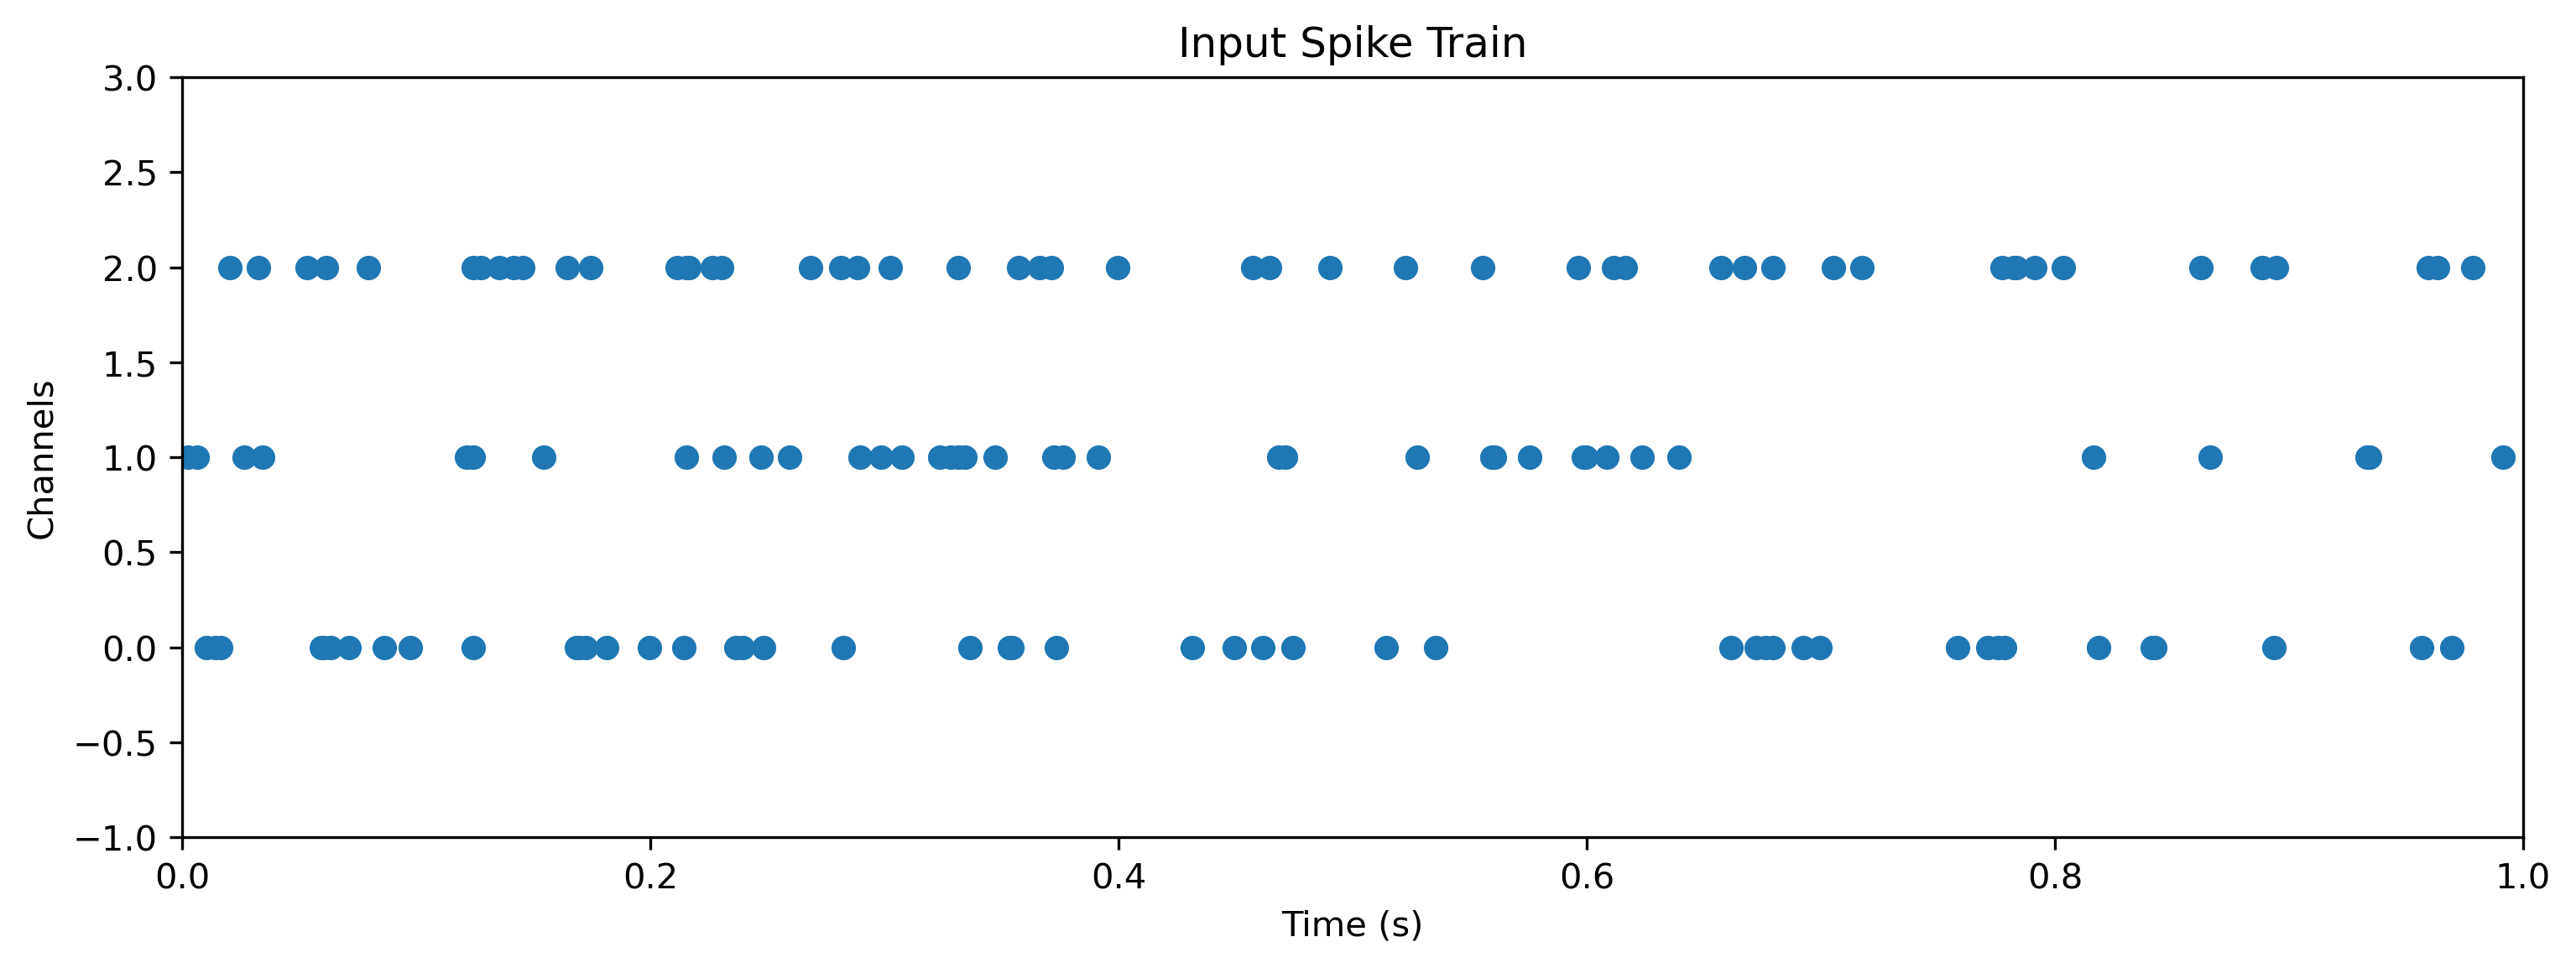

In [14]:
input_ts.plot();

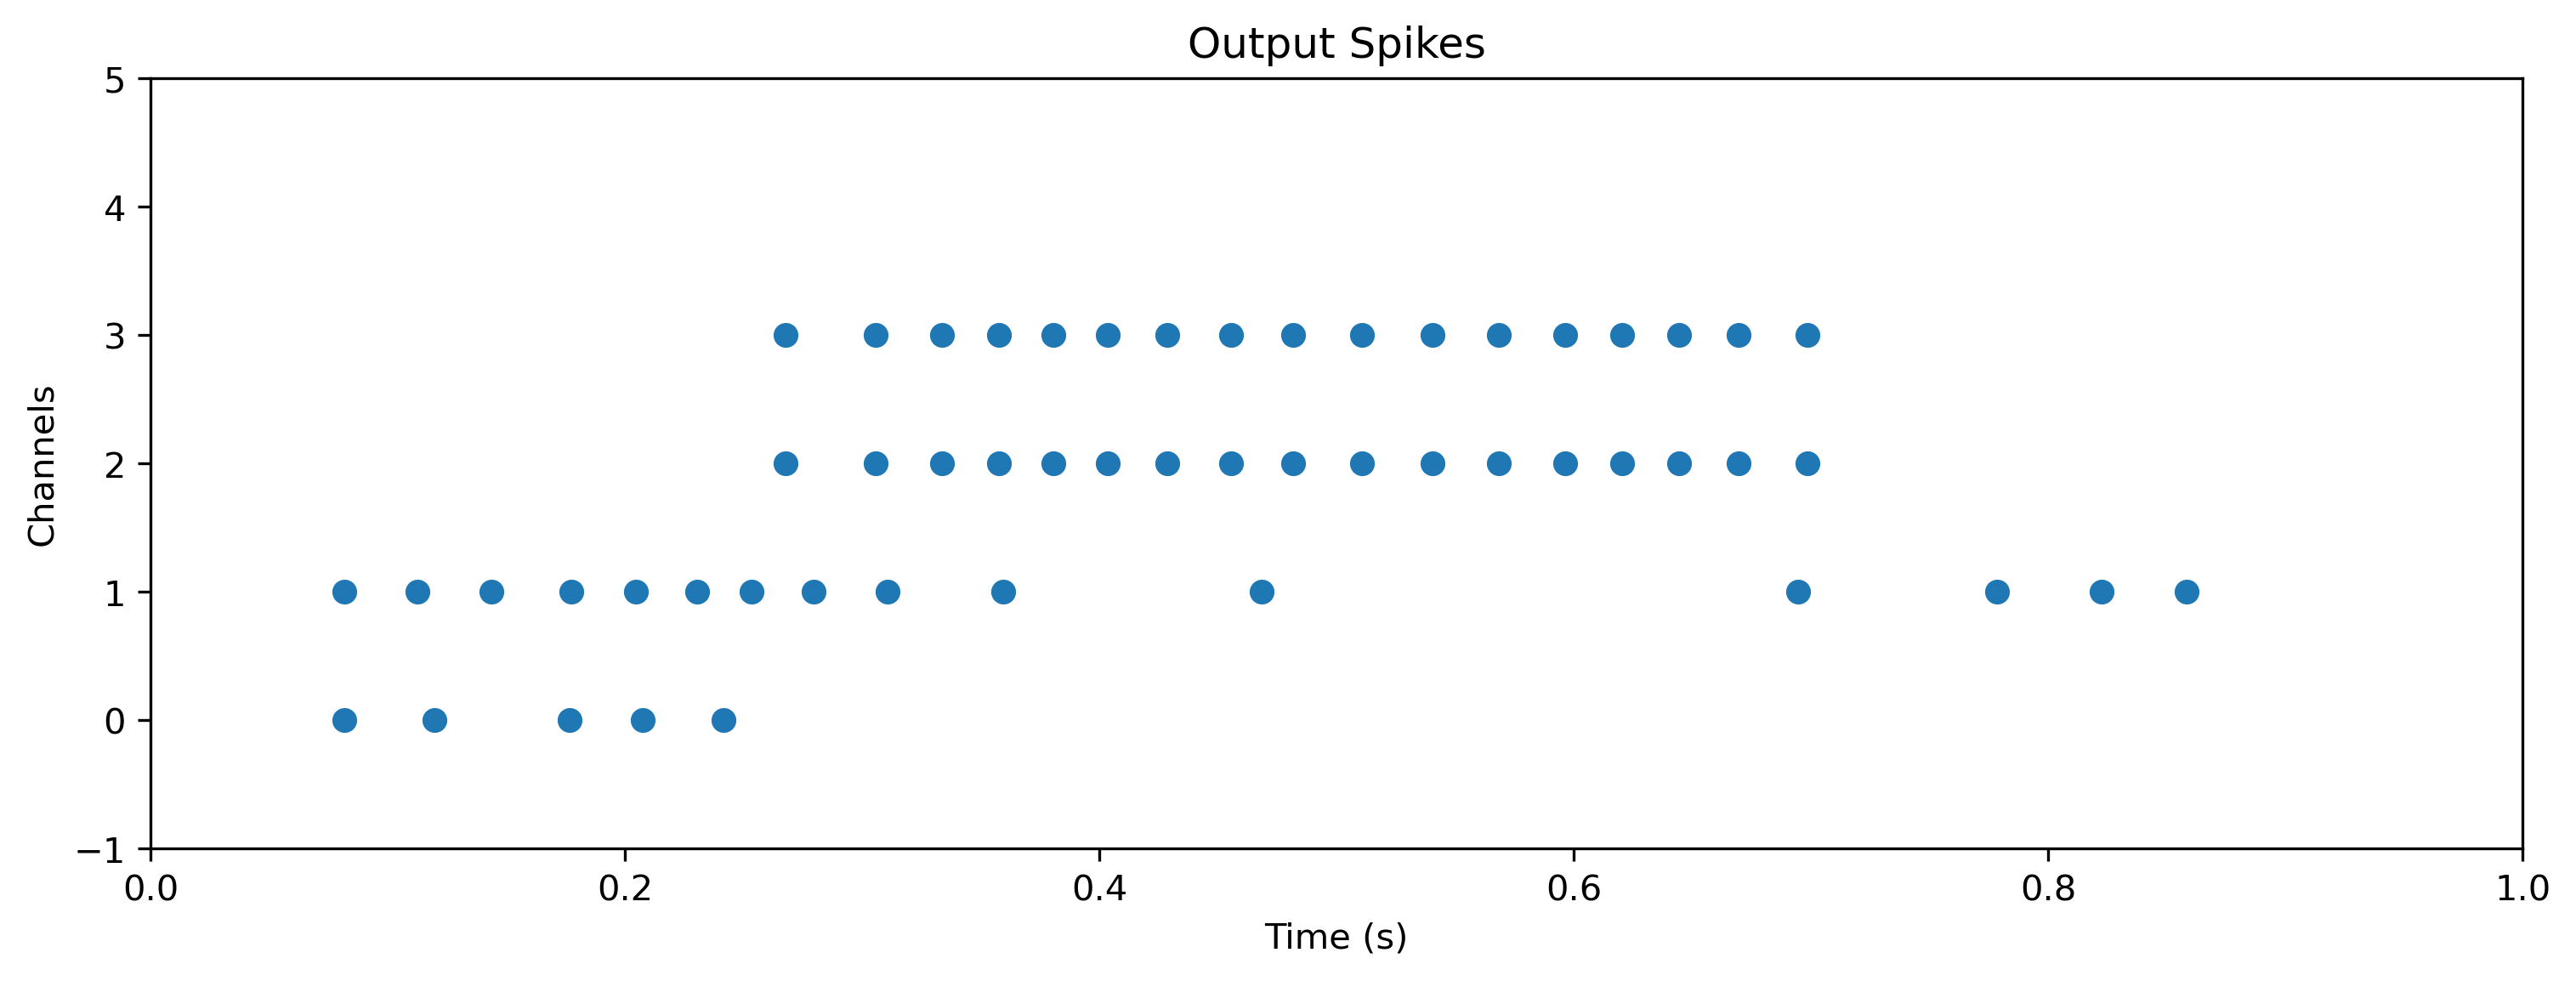

In [15]:
out_spikes, new_state, record_dict = modSE(input_ts.raster(dt = dt))
out = plot_out(out_spikes);